In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
health = pd.read_csv('Behavioral_Risk_Factor_Data__Health-Related_Quality_of_Life__HRQOL_.csv')

health.head()
health.columns

Index([u'Year', u'LocationAbbr', u'LocationDesc', u'Category', u'Topic',
       u'Question', u'DataSource', u'Data_Value_Unit', u'Data_Value_Type',
       u'Data_Value', u'Data_Value_Footnote_Symbol', u'Data_Value_Footnote',
       u'Data_Value_Std_Err', u'Low_Confidence_Limit',
       u'High_Confidence_Limit', u'Sample_Size', u'Break_Out',
       u'Break_Out_Category', u'GeoLocation', u'CategoryId', u'TopicId',
       u'QuestionId', u'LocationId', u'BreakOutId', u'BreakOutCategoryid'],
      dtype='object')

In [7]:
prev = pd.read_csv('Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present_.csv')

prev.head()
prev.columns

Index([u'Year', u'Locationabbr', u'Locationdesc', u'Class', u'Topic',
       u'Question', u'Response', u'Break_Out', u'Break_Out_Category',
       u'Sample_Size', u'Data_value', u'Confidence_limit_Low',
       u'Confidence_limit_High', u'Display_order', u'Data_value_unit',
       u'Data_value_type', u'Data_Value_Footnote_Symbol',
       u'Data_Value_Footnote', u'DataSource', u'ClassId', u'TopicId',
       u'LocationID', u'BreakoutID', u'BreakOutCategoryID', u'QuestionID',
       u'ResponseID', u'GeoLocation'],
      dtype='object')

In [8]:
prev.Question.value_counts()

What is your employment status?                                                                                          28946
What is your marital status?                                                                                             21761
How many children live in your household?                                                                                21611
How is your general health?                                                                                              18260
What is your age?                                                                                                        17172
What is your annual household income?                                                                                    15104
What is your race/ethnicity?                                                                                             15035
Four Level Smoking Status                                                                                      

In [9]:
slq = pandas.read_csv('SLQ_H.csv')

slq.head()

,Unnamed: 0,seqn,sld010h,slq050,slq060
0,1,73557,7,1,2
1,2,73558,9,2,2
2,3,73559,8,2,2
3,4,73561,9,2,2
4,5,73562,5,2,1


Uhh yeah we don't know what that is

In [2]:
b = pd.read_csv('brfss2014_short.csv')

In [3]:
b = b[:10000]
b.head()

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.fobtfs,x.crcrec,x.aidtst3,x.impeduc,x.impmrtl,x.imphome,rcsbrac1,rcsrace1,rchisla1,rcsbirth
0,1,1,1,1172014,1,17,2014,1100,2014000001,2014000001,...,2,1,2,5,1,1,NaN,NaN,NaN,NaN
1,2,1,1,1072014,1,7,2014,1100,2014000002,2014000002,...,2,2,2,4,1,1,NaN,NaN,NaN,NaN
2,3,1,1,1092014,1,9,2014,1100,2014000003,2014000003,...,2,2,2,6,1,1,NaN,NaN,NaN,NaN
3,4,1,1,1072014,1,7,2014,1100,2014000004,2014000004,...,2,1,2,6,3,1,NaN,NaN,NaN,NaN
4,5,1,1,1162014,1,16,2014,1100,2014000005,2014000005,...,2,1,2,5,1,1,NaN,NaN,NaN,NaN


In [3]:
print "Number of rows:", len(b)
print "Number of columns:", len(b.columns)
print b.columns

Number of rows: 9999
Number of columns: 280
Index([u'Unnamed: 0', u'x.state', u'fmonth', u'idate', u'imonth', u'iday',
       u'iyear', u'dispcode', u'seqno', u'x.psu',
       ...
       u'x.fobtfs', u'x.crcrec', u'x.aidtst3', u'x.impeduc', u'x.impmrtl',
       u'x.imphome', u'rcsbrac1', u'rcsrace1', u'rchisla1', u'rcsbirth'],
      dtype='object', length=280)


Get rid of the special codes 77 and 99 in the sleep time column

In [4]:
print b['sleptim1'].mean()
b = b[b.sleptim1 != 77]
b = b[b.sleptim1 != 99]
print b['sleptim1'].mean()

8.91339133913
7.02670501233


The website says that the data should include questions about snoring and how often they feel tired during the day, but we could not find the column id for those. We will look into this further in the future.

These are the relevant rows that we'll be looking at:

In [5]:
sleptim = b['sleptim1']
marital = b['marital']
children = b['children']
employ = b['employ1']
income = b['income2']
weight = b['weight2']
height = b['height3']
sex = b['sex']
useequip = b['useequip']

We tried to find a column for age but there doesn't seem to be any...

Plot value count graphs:

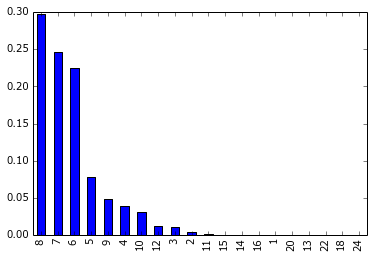

In [6]:
sleptim.value_counts(normalize=True).plot(kind='bar')

It seems like most people get 6-8 hours of sleep a night.

In [22]:
print "               Normal Average Sleep:", sleptim.mean()
print "    Average Sleep of Married People:", sleptim[b['marital'] == 1].mean()
print "Average Sleep of Non-Married People:", sleptim[b['marital'] != 1].mean()

               Normal Average Sleep: 7.02649686762
    Average Sleep of Married People: 7.08015344236
Average Sleep of Non-Married People: 6.97094481605


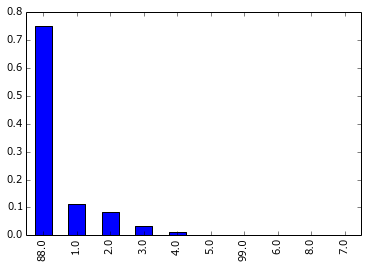

In [7]:
children.value_counts(normalize=True).plot(kind='bar')

A vast majority of respondents have no children

In [8]:
print "   Average Sleep of People with Children:", sleptim[b['children'] != 88].mean()
print "Average Sleep of People without Children:", sleptim[b['children'] == 88].mean()

   Average Sleep of People with Children: 6.82658959538
Average Sleep of People without Children: 7.09297238173


Hmm, pretty big difference there, people with children get about 15 less minutes of sleep than people without.

In [15]:
print "          Average Sleep of Employed People:", sleptim[b['employ1'] == 1].mean()
print "     Average Sleep of Self-Employed People:", sleptim[b['employ1'] == 2].mean()
print "Average Sleep of Unemployed People for >yr:", sleptim[b['employ1'] == 3].mean()
print "Average Sleep of Unemployed People for <yr:", sleptim[b['employ1'] == 4].mean()
print "                 Average Sleep of Students:", sleptim[b['employ1'] == 6].mean()
print "           Average Sleep of Retired People:", sleptim[b['employ1'] == 7].mean()

          Average Sleep of Employed People: 6.84779433246
     Average Sleep of Self-Employed People: 7.07565789474
Average Sleep of Unemployed People for >yr: 6.66115702479
Average Sleep of Unemployed People for <yr: 7.1116751269
                 Average Sleep of Students: 6.91443850267
           Average Sleep of Retired People: 7.34911043974


Some unsurprising things here; retired people sleep a ton, students and employed people sleep less.  For some reason people sleep a lot in their first year of being unemployed, then sleep much less after that.

In [16]:
print "Average Sleep of People who make <10k:", sleptim[b['income2'] == 1].mean()
print "Average Sleep of People who make <15k:", sleptim[b['income2'] == 2].mean()
print "Average Sleep of People who make <20k:", sleptim[b['income2'] == 3].mean()
print "Average Sleep of People who make <25k:", sleptim[b['income2'] == 4].mean()
print "Average Sleep of People who make <35k:", sleptim[b['income2'] == 5].mean()
print "Average Sleep of People who make <50k:", sleptim[b['income2'] == 6].mean()
print "Average Sleep of People who make <75k:", sleptim[b['income2'] == 7].mean()
print "Average Sleep of People who make >75k:", sleptim[b['income2'] == 8].mean()

Average Sleep of People who make <10k: 6.97678571429
Average Sleep of People who make <15k: 6.84316770186
Average Sleep of People who make <20k: 6.87284768212
Average Sleep of People who make <25k: 7.06447534766
Average Sleep of People who make <35k: 7.1081703107
Average Sleep of People who make <50k: 7.05272108844
Average Sleep of People who make <75k: 6.99414225941
Average Sleep of People who make >75k: 7.04641567818


Not really a true linear relationship between income and sleep time.

In [17]:
print "  Average Sleep of Men:", sleptim[b['sex'] == 1].mean()
print "Average Sleep of Women:", sleptim[b['sex'] == 2].mean()

  Average Sleep of Men: 6.98943564081
Average Sleep of Women: 7.04854210784


Women get slightly more sleep than men.

In [18]:
print "   Average Sleep of people with health problems requiring equipment:", sleptim[b['useequip'] == 1].mean()
print "Average Sleep of people without health problems requiring equipment:", sleptim[b['useequip'] == 2].mean()

   Average Sleep of people with health problems requiring equipment: 6.96955345061
Average Sleep of people without health problems requiring equipment: 7.03784389394


"Special Equipment" is pretty broad, so this predictor might not be useful.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

First iteration of a Random Forest:

In [14]:
predictors = ['marital', 'children', 'employ1', 'income2', 'weight2', 'height3', 'sex', 'useequip']

b = b.dropna(subset=['marital', 'children', 'employ1', 'income2', 'weight2', 'height3', 'sex', 'useequip'])

# Initialize our algorithm class
# alg = LinearRegression()
alg = RandomForestClassifier()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(b.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (b[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = b["sleptim1"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(b[predictors].iloc[test,:])
    predictions.append(test_predictions)
    
# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
# predictions[predictions > .5] = 1
# predictions[predictions <=.5] = 0
accuracy = sum(predictions[predictions == b["sleptim1"]]) / len(predictions)
print accuracy
from sklearn import cross_validation
# from sklearn.linear_model import LogisticRegression

# Initialize our algorithm
# alg = LogisticRegression(random_state=1)
alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)

# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, b[predictors], b["sleptim1"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print scores.mean()

6
0.291868126696


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
